<a href="https://colab.research.google.com/github/Abhijith-Nagarajan/PadhAI_Implementations/blob/main/FeedforwardNetwork_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing,model_selection, metrics, datasets
from tqdm import tqdm_notebook
import warnings

In [2]:
warnings.filterwarnings('ignore')

#### Numpy testing

In [ ]:
n = 3

In [ ]:
H = np.random.rand(n,3)
da = np.random.rand(n,5)

In [ ]:
H*(1-H)

array([[0.24901694, 0.17716452, 0.0148509 ],
       [0.22502181, 0.12014049, 0.0844629 ],
       [0.22813078, 0.05140829, 0.16979485]])

In [ ]:
np.multiply(H,1-H)

array([[0.24901694, 0.17716452, 0.0148509 ],
       [0.22502181, 0.12014049, 0.0844629 ],
       [0.22813078, 0.05140829, 0.16979485]])

In [ ]:
np.matmul(H,1-H)

array([[0.6745157 , 0.49475674, 0.43022462],
       [0.63539016, 0.63181972, 0.81034235],
       [0.90277307, 0.67341841, 1.03712588]])

In [ ]:
np.matmul(H,(1-H).T)

array([[0.44103236, 1.10702157, 0.41313511],
       [0.97216917, 0.4296252 , 0.29867325],
       [1.04346395, 1.0638545 , 0.44933392]])

In [ ]:
np.matmul(da.T,H)

array([[0.75248034, 1.89355277, 1.37108509],
       [0.39253245, 0.92517398, 0.92219803],
       [0.42053513, 1.1794654 , 0.46527184],
       [0.50354794, 1.14221176, 0.95742097],
       [0.30196949, 0.65536141, 0.77745705]])

In [ ]:
np.matmul(H.T,da)

array([[0.75248034, 0.39253245, 0.42053513, 0.50354794, 0.30196949],
       [1.89355277, 0.92517398, 1.1794654 , 1.14221176, 0.65536141],
       [1.37108509, 0.92219803, 0.46527184, 0.95742097, 0.77745705]])

#### Testing

In [ ]:
l = [1,2,3,4]
l.insert(3,3.5)

In [ ]:
l

[1, 2, 3, 3.5, 4]


```
def w_b_test(layers: int, neurons_per_layer: list, input_shape: tuple target_classes: int):
    weights = []
    bias = []
    for layer in range(layers):
        m = input_shape[1] if layer==0 else neurons_per_layer[layer-1]
        weights.append(np.random.rand(neurons_per_layer[layer],m))
        bias.append(np.random.rand(input_shape[0],neurons_per_layer[layer]))

    m = neurons_per_layer[-1]
    weights.append(np.random.rand(target_classes,m))
    bias.append(np.random.rand(input_shape[0],target_classes))

    return (weights,bias)
```


```
w, b = w_b_test(layers,neurons_per_layer,sample_data.shape,target_classes)
```

```
A = []
H = []
```

```
def softmax_test(H):
    denominator = np.sum(np.exp(H),axis=1)
    #pdb.set_trace()
    probabilities = [np.round(np.exp(H[i])/denominator[i],2) for i in range(len(denominator))]
    return probabilities

def sigmoid_test(x):
    return 1.0/1.0+np.exp(-1*x)

def matrix_multiplication(X,w,b):
    return np.matmul(X,w.T)+b

def fit(X,w,b,layers):
    # For the hidden layers
    for i in range(layers):
        A.append(matrix_multiplication(X,w[i],b[i]) if i == 0 else matrix_multiplication(H[i-1],w[i],b[i]))
        H.append(sigmoid_test(A[i]))

    # For the last layer. Applying softmax operation to get probabilities
    A.append(matrix_multiplication(H[-1],w[-1],b[-1]))
    H.append(softmax_test(A[-1]))
    y_pred = H[-1]

    return y_pred
```

```
y_pred = fit(sample_data,w,b,layers)
```


```
metrics.log_loss(Y,y_pred)
```


Softmax debugging
```
a = np.array([[0.25,0.15,0.55,0.05],[0.6,0.05,0.25,0.1],[0.1,0.7,0.15,0.05],[0.3,0.1,0.1,0.5]])

numerator = np.exp(a)
numerator

denominator = np.sum(np.exp(a),axis=1)
denominator

print(numerator[index]/denominator[index] for index in range(len(denominator)))

for index in range(len(denominator)):
    print(np.round(numerator[index]/denominator[index],2))
```

#### Generating non-linearly separable data

In [3]:
target_classes = 5

In [4]:
sample_data, labels = datasets.make_blobs(n_samples=10000,n_features=4,centers=target_classes)

In [5]:
sample_data = np.array(sample_data)

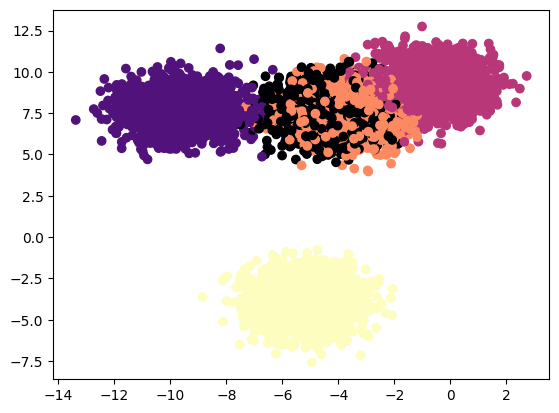

In [6]:
plt.scatter(sample_data[:,0],sample_data[:,1],c=labels,cmap='magma')

In [7]:
oh_encoder = preprocessing.OneHotEncoder()

In [8]:
Y = oh_encoder.fit_transform(np.expand_dims(labels,1)).toarray()

#### Generating the inputs for the NN

In [9]:
def NN_inputs():
    print('Inside NN inputs method')
    nn_layers = int(input("Enter the number of hidden layers: "))
    neurons_per_layer = [int(input(f"Enter neurons for hidden layer {i+1}: ")) for i in range(nn_layers)]

    return (nn_layers,neurons_per_layer)

In [10]:
layers, neurons_per_layer = NN_inputs()

Inside NN inputs method
Enter the number of hidden layers: 3
Enter neurons for hidden layer 1: 3
Enter neurons for hidden layer 2: 4
Enter neurons for hidden layer 3: 3


### Feedforward class

In [11]:
class FeedforwardNN:
    def __init__(self,layers,neurons_per_layer,input_shape,target_classes):
        print('Inside init method.')
        self.weights = []
        self.bias = []
        self.A = []
        self.H = []
        self.predictions = dict()

        rows,features = input_shape

        # For hidden layers
        for layer in range(layers):
            m = features if layer==0 else neurons_per_layer[layer-1]
            self.weights.append(np.random.rand(neurons_per_layer[layer],m)/np.sqrt(neurons_per_layer[layer]))
            self.bias.append(np.random.rand(rows,neurons_per_layer[layer]))

        # For output layer
        m = neurons_per_layer[-1]
        self.weights.append(np.random.rand(target_classes,m)/np.sqrt(target_classes))
        self.bias.append(np.random.rand(rows,target_classes))
        print('Weights and Bias have been initialized.')

    def plot_loss_vs_epoch(self,loss:dict):
        plt.figure(figsize=(15,7))
        plt.plot(loss.keys(),loss.values())
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Loss vs Epoch')

    def softmax_operation(self,a):
        exp_term = np.exp(a)
        sum_of_exp = np.sum(exp_term,axis=1)
        return [exp_term[index]/sum_of_exp[index] for index in range(len(sum_of_exp))]

    def sigmoid_operation(self,a):
        return 1.0/(1.0+np.exp(-1*(a)))

    def derivative_sigmoid(self,layer):
        return self.H[layer]*(1-self.H[layer])

    def backprop(self,X,Y,Y_pred,layers,learning_rate):
        '''
        This method performs back propagation to update W,B,A,H
        '''
        grad_a = Y_pred-Y
        rows = X.shape[0]
        for layer in range(layers,0,-1):
            dw = np.matmul(grad_a.T,self.H[layer-1])
            db = grad_a

            self.weights[layer] -= learning_rate*(dw/rows)
            self.bias[layer] -= learning_rate*(db/rows)

            grad_h = np.matmul(grad_a, self.weights[layer])
            # Grad a is computed as an element-wise multiplication of grad_h and derivative of the {[activation for 'a'] = H}  at the previous layer
            derivative_h = self.derivative_sigmoid(layer-1)
            grad_a = np.multiply(grad_h,derivative_h)

        dw = np.matmul(grad_a.T,X)
        self.weights[0] -= learning_rate*(dw/rows)
        self.bias[0] = (grad_a/rows)

    def forward_pass(self,X,layers:int):
        '''
        This method performs the forward pass.
        '''
        for layer in range(layers):
            a = np.matmul(X,self.weights[layer].T)+self.bias[layer] if layer==0 else np.matmul(self.H[layer-1],self.weights[layer].T)+self.bias[layer]
            self.A.append(a)
            self.H.append(self.sigmoid_operation(a))

        a = np.matmul(self.H[-1],self.weights[-1].T)+self.bias[-1]
        self.A.append(a)
        self.H.append(self.softmax_operation(a))
        return self.H[-1]

    def fit(self,X,Y,epochs,layers,learning_rate):
        '''
        This method performs the training operation
        '''
        loss = dict()
        for epoch in tqdm_notebook(range(epochs),total=epochs,unit="epoch"):
            y_pred = self.forward_pass(X,layers)
            self.predictions[epoch+1] = y_pred
            loss[epoch+1] = metrics.log_loss(Y,y_pred)
            self.backprop(X,Y,y_pred,layers,learning_rate)
            print(f'Loss after epoch {epoch+1}: {loss[epoch+1]}')

        self.plot_loss_vs_epoch(loss)

    def predict(self,X):
        '''
        This method returns all the predictions on the test set
        '''

In [21]:
lr = 0.20
epochs = 1000

In [22]:
ffmodel = FeedforwardNN(layers,neurons_per_layer,sample_data.shape,target_classes)

Inside init method.
Weights and Bias have been initialized.


  0%|          | 0/1000 [00:00<?, ?epoch/s]

Loss after epoch 1: 1.6469022036061354
Loss after epoch 2: 1.6460699330276956
Loss after epoch 3: 1.6453442128734919
Loss after epoch 4: 1.6447110614033547
Loss after epoch 5: 1.6441583564563054
Loss after epoch 6: 1.64367558054096
Loss after epoch 7: 1.6432536029239804
Loss after epoch 8: 1.6428844928392905
Loss after epoch 9: 1.6425613589875938
Loss after epoch 10: 1.6422782113337482
Loss after epoch 11: 1.6420298418842627
Loss after epoch 12: 1.6418117216736343
Loss after epoch 13: 1.6416199116333654
Loss after epoch 14: 1.6414509853822368
Loss after epoch 15: 1.6413019622769511
Loss after epoch 16: 1.6411702493113032
Loss after epoch 17: 1.6410535906595363
Loss after epoch 18: 1.6409500238332744
Loss after epoch 19: 1.6408578415676318
Loss after epoch 20: 1.6407755586756845
Loss after epoch 21: 1.6407018832153735
Loss after epoch 22: 1.6406356914022904
Loss after epoch 23: 1.64057600577819
Loss after epoch 24: 1.6405219762106007
Loss after epoch 25: 1.6404728633552415
Loss after ep

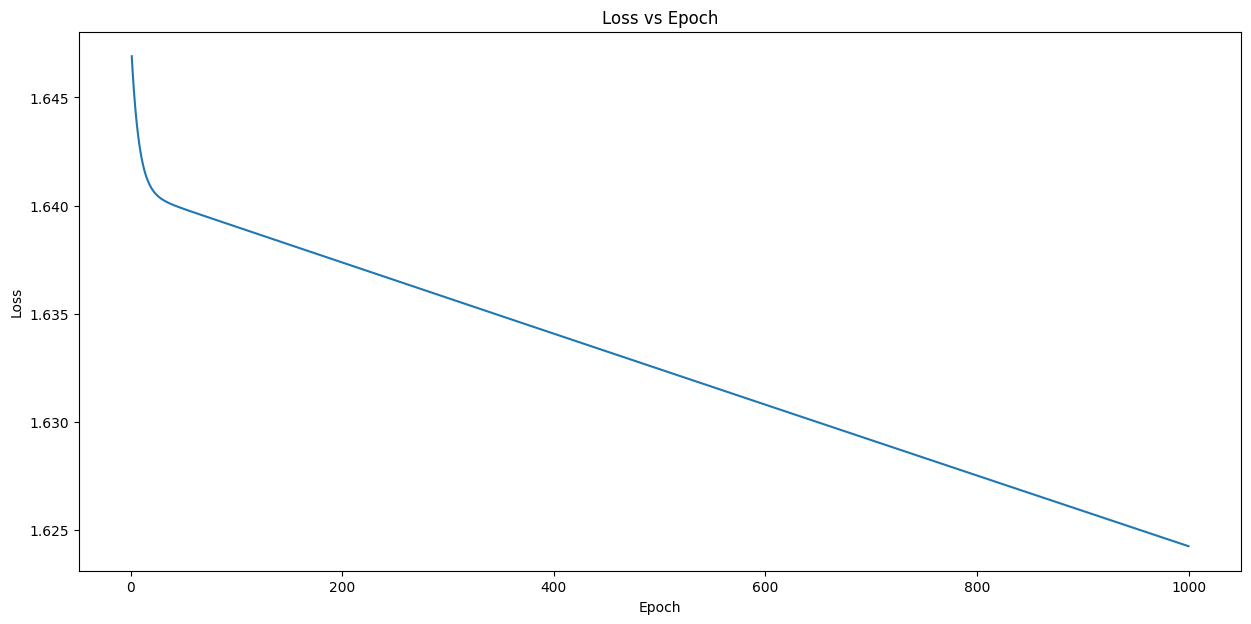

In [23]:
ffmodel.fit(sample_data,Y,epochs,layers,lr)

Conclusions:  

*   The Feedforward Network has forward and backprop implemented for Gradient Descent algorithm.
*   The weights were initialized using Xavier initialization method. Here, the weights of a particular layer are divided by the sqrt of neurons in the layer
*   While updating the weights and bias, the gradient is divided by the either the total rows/batch size depending on the update mechanism.
*   Gradient descent is extrememly slow, as the loss has taken 1000 epochs to decrease from 1.640 to 1.625.

